### In this file, we'll achieve a simple UI using tkinter for the song title searching function

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [2]:
data = pd.read_csv('processed_data')
data = data.iloc[:,1:]
data

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,NumArtists,artist_popularity,NameLength
0,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0,1.0,0,4.0
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', ' Vladimir Horowitz']",282133,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0,2.0,0,6.0
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0,1.0,0,5.0
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0,1.0,0,5.0
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', ' Vladimir Horowitz']",687733,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0,2.0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,Skechers (feat. Tyga) - Remix,"['DripReport', ' Tyga']",163800,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1,2.0,0,5.0
169905,Sweeter (feat. Terrace Martin),"['Leon Bridges', ' Terrace Martin']",167468,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0,2.0,0,4.0
169906,How Would I Know,"['Kygo', ' Oh Wonder']",180700,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0,2.0,0,4.0
169907,I Found You,"['Cash Cash', ' Andy Grammer']",167308,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0,2.0,0,3.0


## KNN recommendation based on feature

class KNN_byfeature:
    def __init__(self, dataset):
        self.data = dataset.iloc[:,2:]
        self.data_matrix = np.matrix(self.data.values)
        self.feature_list = list(self.data.columns).remove('year')
        self.status = True
        self.error_message = ''
        self.index = 0
        self.num_recommendation = 5
        
    def check_index(self,target,feature_name)
        for i in range(len(self.data[feature_name].values)):
        if target == self.data[feature_name].values[i]:
            self.index = i
            return self.index
        
    def check_existence(self,input):
        if input not in self.feature_list:
            self.status = False
        else:
            self.status = True
        return self.status
        
    def check_percentage(self,percentage):
        try:
            self.percentage = float(percentage)
        except ValueError:
            self.error_message = 'You did not input a correct number. Pertcentage is fractional number in range [0,1]. Please try again'
            
        if self.percentage>1 or self.percentage<0:
            self.status = False
        else:
            self.status = True
            
    def search(self,input):
        self.knn = NearestNeighbors(metric = 'cosine', algorithm='auto', leaf_size=30, n_neighbors=5, p=2,radius=1.0)
        self.knn.fit(self.data_matrix)
        target = data2[inp].quantile(q = lvl,interpolation='nearest')
        

In [14]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [15]:
class KNN_byname:
    def __init__(self, dataset):
        self.data = dataset
        self.data_num = dataset.iloc[:,2:]
        self.data_matrix = np.matrix(self.data_num.values)
        self.knn = NearestNeighbors(metric = 'cosine', algorithm='auto', leaf_size=30, n_neighbors=5, p=2,radius=1.0)
        self.knn.fit(self.data_matrix)
        self.feature_list = list(self.data.columns).remove('year')
        self.status = True
        self.index = 0
#         self.num_recommendation = 5
        

    def check_title_index(self,inp):
        #title = input('Please in put a song you like ヽ(○´∀`)ﾉ♪')
        self.warning = 'The song you want to search does not exist in Spotify dataset. Please Try another one :('
        for i in range(len(self.data['name'])):
            if inp.lower() == self.data['name'].values[i].lower():
                self.index = i
                break
            else:
                self.index = 'none'
        if self.index != 'none':
            return self.index
        if self.index == 'none':
            return self.warning
        
    def knn_recommendation(self,random_status,query):
        self.recom = []
        if random_status == True:
            query_index = np.random.choice(data.shape[0])
        else:
            #title = input('Please in put a song you like ヽ(○´∀`)ﾉ♪')
            ind = self.check_title_index(query)
            if type(ind) == int:
                query_index = ind
            else:
                return ind

        distances, indices = self.knn.kneighbors(self.data_matrix[query_index,:], n_neighbors=6)
        indices = indices[0]
        indices = list(indices)
        #indices.remove(query_index)
        #print('Here are',num_recommendation,'recommended songs for you :)')
        for i in range(len(indices)):
            song_name = data.iloc[indices[i],:]['name']
            artists_lis = data.iloc[indices[i],:].artists
            artists_lis = ''.join(artists_lis)
            year = data.iloc[indices[i],:].year
            self.recom.append((song_name,artists_lis,year))
            #print('#',i+1,"♪(´∇`*)")
            #print('Song Name:',song_name)
            #print('Artist Name:', artists_lis)
            #print('The year of publication is:',year)

In [ ]:
from tkinter import*
from tkinter_custom_button import TkinterCustomButton


root = Tk()
root.title('Wonderful Music Recommendation System')
root.geometry("360x780")
root.configure(bg='black')

# Clear
def clear():
    my_entry.delete(0, END)
    my_text.delete(0.0, END)
    

# Search
def search():
    engine = KNN_byname(data)
    engine.knn_recommendation(False,my_entry.get())
    result = engine.recom
    if len(result) != 0:
    # Output system Results To Textbox
        my_text.insert(INSERT, "\n")
        for i in range(len(result)):
                my_text.insert(END,"Song_Name : "+str(result[i][0]))
                my_text.insert(INSERT, "\n")
                my_text.insert(END,"Artist : "+str(result[i][1]) + "  "+"The year of publication is : "+str(result[i][2]))
                my_text.insert(INSERT, "\n")
                my_text.insert(END,"\n****-------------------------------------------***\n")
                my_text.insert(INSERT, "\n")
    else:
    #random generate results
        engine = KNN_byname(data)
        engine.knn_recommendation(True,my_entry.get())
        result = engine.recom
        my_text.insert(END,"'The song you want to search does not exist in Spotify dataset.\n But here are some recommendation for you\n ")
        my_text.insert(END,"\n-------------------------------------------\n")
        for i in range(len(result)):
                my_text.insert(END,"Song_Name : "+str(result[i][0]))
                my_text.insert(INSERT, "\n")
                my_text.insert(END,"Artist : "+str(result[i][1]) + "  "+"The year of publication is : "+str(result[i][2]))
                my_text.insert(INSERT, "\n")
                my_text.insert(END,"\n****-------------------------------------------***\n")
                my_text.insert(INSERT, "\n")
    
my_label_frame = LabelFrame(root, text="Please in put a song you like ヽ(○´∀`)ﾉ♪",bg = 'Green',fg = 'white',font=("Helvetica", 20),highlightbackground ='Green')
my_label_frame.pack(pady=20)

# Create entry box
my_entry = Entry(my_label_frame, font=("Helvetica", 15), width=47,bg = 'Green',fg = 'white')
#my_entry.config({"background": "White"})
my_entry.pack(pady=10, padx=10)

# create text box frame
my_frame = Frame(root,bg = 'black',width=47, height=300)
my_frame.pack(pady=5)

# Create Text Box
my_text = Text(my_frame, wrap="word",bg = 'black',fg = 'white',highlightbackground ='black',height=300,font=("Helvetica", 12))

my_text.pack()

# Button Frame
button_frame = Frame(root)
button_frame.pack(pady=10)

# Buttons
search_button = TkinterCustomButton(text="Search", corner_radius=10, command=search,fg_color = 'green')
search_button.place(relx=0.25, rely=0.9,anchor=CENTER)

clear_button = TkinterCustomButton(text="Clear", corner_radius=10, command=clear,fg_color = 'green')
clear_button.place(relx=0.65, rely=0.9,anchor=CENTER)


root.mainloop()

/Users/sandychen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/sandychen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/sandychen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  w

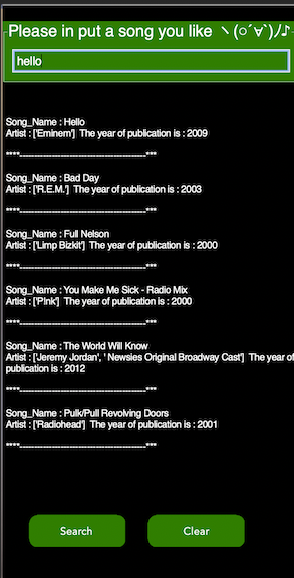